In [8]:
from pathlib import Path

import cantera as ct
import polars
from IPython import get_ipython
from matplotlib import pyplot as plt

from cantera_practice import reactors

tag, *_ = Path(get_ipython().user_ns.get("__vsc_ipynb_file__")).stem.split(".")

In [2]:
model = ct.Solution("data/full_A_rh-oh_p1v0_control.yaml")
conc_df = polars.read_csv("data/webb_concentrations.csv")
ref_df = polars.read_csv("data/webb_reference.csv")

In [3]:
temp = 825
pres = 1.1 * ct.one_atm  # in atm.
concs = conc_df.select("CPT(563)", "N2", "O2(6)").rows(named=True)

tau = 4  # s
vol = 1 * (1e-2) ** 3  # m3

In [4]:
# Create a SolutionArray to store values for the above points
solns = ct.SolutionArray(model)

In [5]:
for conc in concs:
    print(f"Starting simulation for {conc}")
    reactor = reactors.jsr(model=model, temp=temp, pres=pres, tau=tau, vol=vol, conc=conc)
    solns.append(reactor.thermo.state)

Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9825, 'O2(6)': 0.0125}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97625, 'O2(6)': 0.01875}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.973571429, 'O2(6)': 0.021428571}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97, 'O2(6)': 0.025}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.965, 'O2(6)': 0.03}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.960909091, 'O2(6)': 0.034090909}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9575, 'O2(6)': 0.0375}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.953333333, 'O2(6)': 0.041666667}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.945, 'O2(6)': 0.05}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.937307692, 'O2(6)': 0.057692308}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9325, 'O2(6)': 0.0625}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.926818182, 'O2(6)': 0.068181818}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.92, '

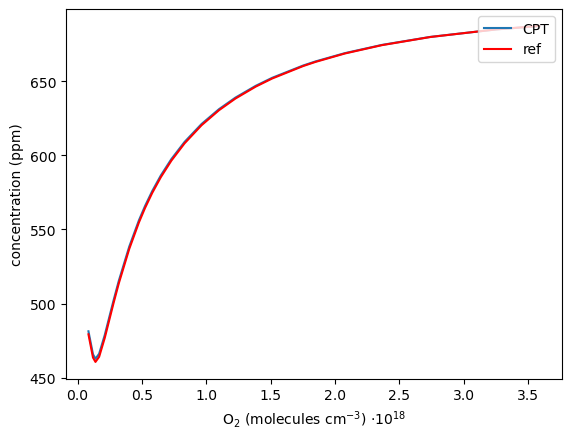

In [7]:
plt.figure()
plt.plot(
    solns("O2(6)").X * 9.782586051,
    solns("C5H8(522)").X * 10**6,
    color="C0",
    label="CPT",
)
plt.plot(
    ref_df["O2(6)"] * 9.782586051, ref_df["C5H8(522)"] * 10**6, color="red", label="ref"
)

plt.xlabel(r"O$_2$ (molecules cm$^{-3}$) $\cdot 10^{18}$")
plt.ylabel("concentration (ppm)")

plt.legend(loc=1)

In [12]:
name_dct = {
    "O2(6)": "O2(6)",  # oxygen
    "CPT(563)": "CPT(563)",  # cyclopentane
    "C5H8(522)": "C5H8(522)",  # cyclopentene
    "C5H8O(825)": "C5H8O(825)rs",  # 1,2-epoxycyclopentane
    "C3H4O(165)": "C3H4O(165)",  # acrolein
    "CH3CHO(41)": "CH3CHO(41)",  # acetaldehyde
}
conc_df = conc_df.with_columns(
    *(polars.Series(k, solns(v).X.flatten()) for k, v in name_dct.items())
)
conc_df.write_csv(f"data/{tag}.csv")
conc_df

phi,Oxygen Concentration (molecules*cm^-3 *10^-18),CPT(563),N2,O2(6),C5H8(522),C5H8O(825)rs,C3H4O(165),CH3CHO(41),O2,CPT,C5H8,C5H8O,C3H4O,CH3CHO,C5H8O(825)
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3.0,0.12233,0.002337,0.9825,0.008587,0.000481,0.000028,0.000344,0.000039,0.008587,0.002337,0.000481,0.000028,0.000344,0.000039,0.000028
2.0,0.1835,0.001599,0.97625,0.012207,0.000466,0.000033,0.000318,0.000051,0.012207,0.001599,0.000466,0.000033,0.000318,0.000051,0.000033
1.75,0.20962,0.001453,0.973571,0.014164,0.000463,0.000035,0.000298,0.00005,0.014164,0.001453,0.000463,0.000035,0.000298,0.00005,0.000035
1.5,0.24456,0.001334,0.97,0.017075,0.000466,0.000037,0.000274,0.000048,0.017075,0.001334,0.000466,0.000037,0.000274,0.000048,0.000037
1.25,0.29347,0.001245,0.965,0.021535,0.000479,0.000039,0.000246,0.000043,0.021535,0.001245,0.000479,0.000039,0.000246,0.000043,0.000039
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.17,2.15785,0.001129,0.774412,0.212159,0.000669,0.000062,0.000072,0.000009,0.212159,0.001129,0.000669,0.000062,0.000072,0.000009,0.000062
0.15,2.44557,0.001131,0.745,0.241602,0.000675,0.000063,0.000068,0.000008,0.241602,0.001131,0.000675,0.000063,0.000068,0.000008,0.000063
0.13,2.75147,0.001133,0.706538,0.280083,0.00068,0.000064,0.000063,0.000007,0.280083,0.001133,0.00068,0.000064,0.000063,0.000007,0.000064
